In [1]:
import numpy as np
import time
import sys

from matplotlib import pyplot as plt

In [2]:
# we scale the z = 0 power spectrum given to give z = 0.8 results
z, D, f = 0.8, 0.6819, 0.8076
k, p = np.loadtxt('pk.dat').T
knw, pnw = np.loadtxt('pnw.dat').T

In [3]:
from velocileptors.EPT.cleft_kexpanded_resummed_fftw import RKECLEFT
from velocileptors.EPT.ept_fullresum_fftw import REPT

In [4]:
cleft = RKECLEFT(k, p, pnw=pnw)
rept  = REPT(k, D**2*p, pnw=D**2*pnw,kmin=1e-3,kmax=1.0,nk=500)

In [5]:
# Make D = 1 ptable
cleft.make_ptable(D=D,kmin=1e-3,kmax=1.0,nk=500)

pars = [1,0,0,0,0,0,0,0,0,0,0]
pmatter = rept.compute_redshift_space_power_at_mu(pars,0,0)[1]

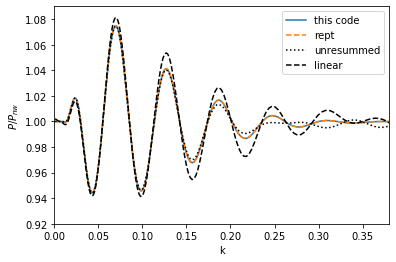

In [25]:
plt.plot(cleft.kv, cleft.pktable[:,1]/cleft.pnwtable[:,1], label='this code')
plt.plot(cleft.kv, pmatter/cleft.pnwtable[:,1],'--', label='rept')
plt.plot(cleft.kv, cleft.pwtable[:,1]/cleft.pnwtable[:,1], 'k:', label='unresummed')

# plot broadband-supplemented linear theory
from scipy.optimize import curve_fit
func = lambda x, a, b, c, d: a + b*x + c*x**2 + d*x**3
res = curve_fit(func, cleft.kv[cleft.kv < 0.4],\
                (cleft.pwtable_linear[:,1]/cleft.pnwtable[:,1] - cleft.pktable[:,1]/cleft.pnwtable[:,1])[cleft.kv < 0.4])[0]

plt.plot(cleft.kv, cleft.pwtable_linear[:,1]/cleft.pnwtable[:,1] - func(cleft.kv, *res), 'k--', label='linear + bband')

plt.xlim(0,0.38)
plt.ylim(0.92,1.09)
plt.xlabel('k')
plt.ylabel(r'$P/P_{nw}$')
plt.legend()
#plt.ylim(300,750)



In [14]:
res[0]

array([ 0.99696696,  0.59561841, -8.96623865, 12.52117975])

In [7]:
# Let's explicitly list the components
# Note that the cross spectra are multiplied by a factor of one half.

kv = cleft.pktable[:,0]

spectra = {\
          r'$(1,1)$':cleft.pktable[:,1],\
          r'$(1,b_1)$':0.5*cleft.pktable[:,2], r'$(b_1,b_1)$': cleft.pktable[:,3],\
          r'$(1,b_2)$':0.5*cleft.pktable[:,4], r'$(b_1,b_2)$': 0.5*cleft.pktable[:,5],  r'$(b_2,b_2)$': cleft.pktable[:,6],\
          r'$(1,b_s)$':0.5*cleft.pktable[:,7], r'$(b_1,b_s)$': 0.5*cleft.pktable[:,8],  r'$(b_2,b_s)$':0.5*cleft.pktable[:,9], r'$(b_s,b_s)$':cleft.pktable[:,10],\
          r'$(1,b_3)$':0.5*cleft.pktable[:,11],r'$(b_1,b_3)$': 0.5*cleft.pktable[:,12]}

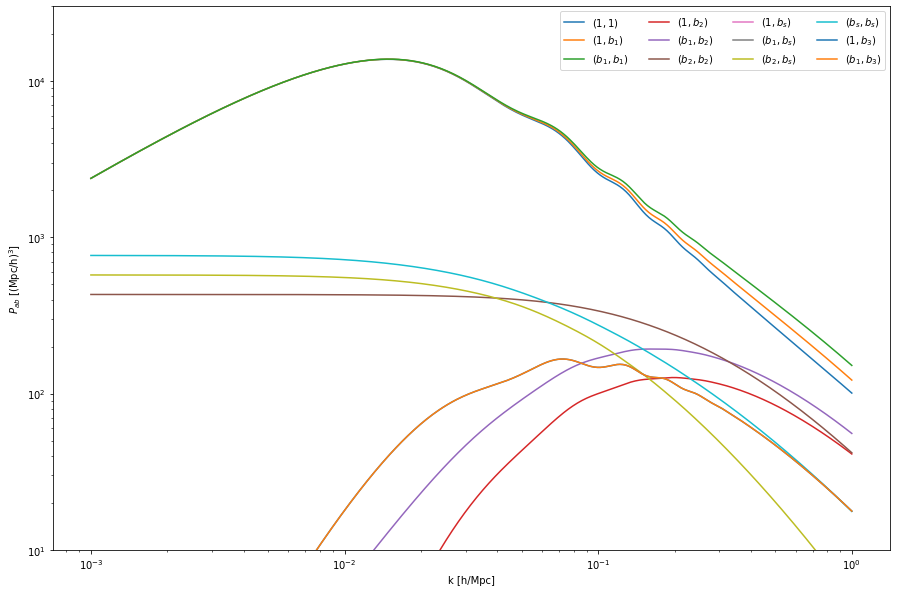

In [8]:
# Plot some of them!

plt.figure(figsize=(15,10))

spec_names = spectra.keys()

for spec_name in spec_names:    
    plt.loglog(kv, spectra[spec_name],label=spec_name)
plt.ylim(10,3e4)
plt.legend(ncol=4)
plt.xlabel('k [h/Mpc]')
plt.ylabel(r'$P_{ab}$ [(Mpc/h)$^3$]')  
plt.show()